Regressor para previsibilidade de preço de casas usando MLPRegressor.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [30]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_csv.csv')
dataframe = dataframe.drop(['classe'], axis=1)
dataframe

,Gravidez,Glicose,PressaoArterial,EspessuraPele,Insulina,IMC,DiabetesPedigree,Idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


**Preprocessamento**

In [8]:
x = dataframe.drop('Idade', axis=1)
y = dataframe['Idade']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

**Preprocessamento - Normalização de Dados**: a normalização altera os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Por exemplo cálculo de média e desvio padrão de variáveis que possuem valores distante entre si. *Sálario* e *Idade* são exemplos dessas variáveis, e sem a devida normalização a variável Salario pode influenciar de modo negativo no treinamento e teste da rede. 

In [9]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

Usando o MLPRegressor

In [11]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam',verbose=True)

mlp_reg.fit(trainX_scaled, trainY)

Iteration 1, loss = 607.91199688
Iteration 2, loss = 588.86292956
Iteration 3, loss = 567.94608039
Iteration 4, loss = 543.37634820
Iteration 5, loss = 513.00077720
Iteration 6, loss = 473.28512487
Iteration 7, loss = 424.90785849
Iteration 8, loss = 366.01666932
Iteration 9, loss = 299.71130265
Iteration 10, loss = 228.26438162
Iteration 11, loss = 163.38167505
Iteration 12, loss = 114.33912547
Iteration 13, loss = 90.39677495
Iteration 14, loss = 86.94450720
Iteration 15, loss = 88.92698527
Iteration 16, loss = 83.01655220
Iteration 17, loss = 73.05885769
Iteration 18, loss = 66.92435916
Iteration 19, loss = 64.96653471
Iteration 20, loss = 64.11596773
Iteration 21, loss = 63.22096999
Iteration 22, loss = 61.92800267
Iteration 23, loss = 60.45682876
Iteration 24, loss = 59.17526750
Iteration 25, loss = 59.07522766
Iteration 26, loss = 58.19987487
Iteration 27, loss = 57.37484391
Iteration 28, loss = 56.37414497
Iteration 29, loss = 55.25326355
Iteration 30, loss = 54.42093943
Iterati

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300, verbose=True)

Avaliação do Modelo

In [12]:
y_pred = mlp_reg.predict(testX_scaled)

In [14]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
79,24,26.099891
109,24,22.772505
128,40,26.386521
85,27,26.505409
300,30,38.001324


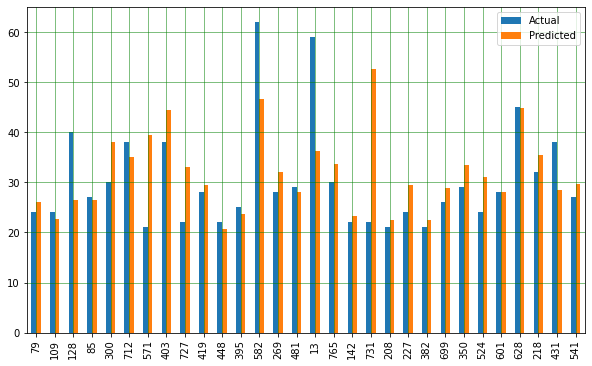

In [15]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 6.8866113664807616
Mean Squared Error: 103.50892882983882
Root Mean Squared Error: 10.173933793269878


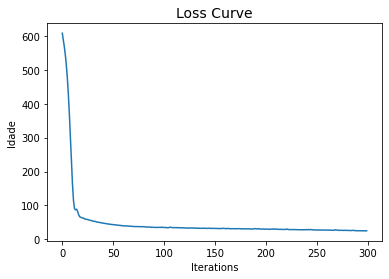

In [18]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Idade')
plt.show()

Hyper parametros de refinamento - Definição dos valores de parâmentos de refinamento em uma coleção de dados (param_grid). 

In [19]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

Utilização dos parêmetros de refinamento afim de melhorar o desempenho da rede no que diz respeito a melhoria do score e fit da rede (diminuição da taxa de erro). 

In [21]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

Iteration 5, loss = 96.33649399
Iteration 6, loss = 79.75058364
Iteration 7, loss = 69.78209093
Iteration 8, loss = 74.42040237
Iteration 9, loss = 75.90606573
Iteration 10, loss = 71.51473480
Iteration 11, loss = 69.07190145
Iteration 12, loss = 68.35885498
Iteration 13, loss = 67.78032642
Iteration 14, loss = 66.78160242
Iteration 15, loss = 65.93521406
Iteration 16, loss = 63.12786166
Iteration 17, loss = 59.87867632
Iteration 18, loss = 56.31576520
Iteration 19, loss = 53.50232736
Iteration 20, loss = 50.82620046
Iteration 21, loss = 47.84143971
Iteration 22, loss = 45.89937300
Iteration 23, loss = 43.82171588
Iteration 24, loss = 41.63111249
Iteration 25, loss = 40.42204231
Iteration 26, loss = 39.82866191
Iteration 27, loss = 39.79106434
Iteration 28, loss = 39.02383890
Iteration 29, loss = 39.23526216
Iteration 30, loss = 38.77128140
Iteration 31, loss = 38.34599725
Iteration 32, loss = 38.08433420
Iteration 33, loss = 38.08127723
Iteration 34, loss = 38.00508090
Iteration 35, l

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [22]:
grid_predictions = grid.predict(testX_scaled) 

In [23]:
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
79,24,24.406979
109,24,24.080483
128,40,25.659987
85,27,25.069391
300,30,32.307172


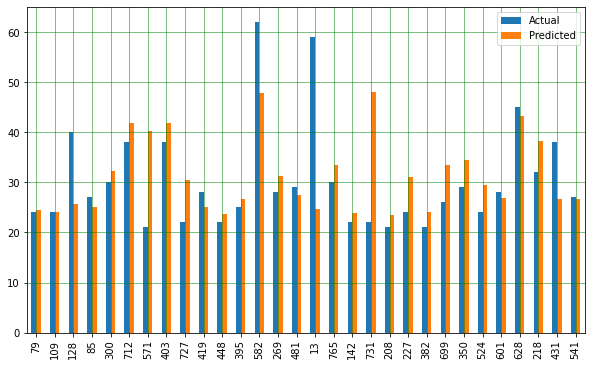

In [24]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

Mean Absolute Error: 6.581224839251254
Mean Squared Error: 101.64874194979782
Root Mean Squared Error: 10.08210007636295
